# Proyek Analisis Data: PRSA_Data_Nongzhanguan_20130301-20170228
- **Nama:** Muhammad Za'im S
- **Email:** muhammad.zaim67@gmail.com
- **ID Dicoding:** muhammad_zaim_shidqi

## Menentukan Pertanyaan Bisnis

*   Bagaimana tingkat polutan (PM2.5, PM10, SO2, NO2, CO, O3) bervariasi di musim atau bulan tertentu?
*   Apakah curah hujan memiliki dampak yang signifikan dalam mengurangi materi partikulat (PM2.5, PM10) di atmosfer?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
prsa_df = pd.read_csv('/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
prsa_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


### Assessing Data

In [5]:
prsa_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [6]:
prsa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
prsa_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206



disini saya menemukan banyak missing value pada data frame ini

In [8]:
print("Jumlah duplikasi: ", prsa_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi pada dataframe ini

In [9]:
def calculate_iqr(prsa_df, column_name):
    q1 = prsa_df[column_name].quantile(0.25)
    q3 = prsa_df[column_name].quantile(0.75)
    iqr = q3 - q1
    return iqr

def outlier_detection(prsa_df, column_name):
    iqr = calculate_iqr(prsa_df, column_name)
    lower_bound = prsa_df[column_name].quantile(0.25) - 1.5 * iqr
    upper_bound = prsa_df[column_name].quantile(0.75) + 1.5 * iqr
    outliers = prsa_df[(prsa_df[column_name] < lower_bound) | (prsa_df[column_name] > upper_bound)]

    return outliers

In [10]:
outlier_pm25 = outlier_detection(prsa_df, 'PM2.5')
print(f"Outliers in PM2.5: {len(outlier_pm25)}")


Outliers in PM2.5: 1765


In [11]:
outlier_pm10 = outlier_detection(prsa_df, 'PM10')
print(f"Outliers in PM10: {len(outlier_pm10)}")

Outliers in PM10: 1379


dari 35064 data terdapat 1765 outlier dari PM2.5 dan 1379 outlier dari PM10

### Cleaning Data

In [12]:
prsa_df[prsa_df['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1258,1259,2013,4,22,10,NaN,175.0,49.0,68.0,1100.0,33.0,14.1,1011.2,5.4,0.0,S,3.5,Nongzhanguan
1259,1260,2013,4,22,11,NaN,205.0,51.0,70.0,1200.0,50.0,14.5,1011.0,6.1,0.0,SSW,3.1,Nongzhanguan
1260,1261,2013,4,22,12,NaN,196.0,57.0,62.0,1300.0,55.0,14.3,1010.9,6.1,0.0,SSW,3.1,Nongzhanguan
1331,1332,2013,4,25,11,NaN,73.0,3.0,23.0,400.0,90.0,20.0,1009.7,-8.4,0.0,NNW,5.2,Nongzhanguan
1620,1621,2013,5,7,12,NaN,NaN,46.0,109.0,2200.0,25.0,28.8,1011.3,11.4,0.0,WSW,1.4,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35026,35027,2017,2,27,10,NaN,NaN,NaN,NaN,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan
35029,35030,2017,2,27,13,NaN,6.0,40.0,93.0,200.0,32.0,14.0,1015.8,-5.2,0.0,SSE,1.8,Nongzhanguan
35042,35043,2017,2,28,2,NaN,NaN,NaN,NaN,NaN,NaN,8.6,1016.0,-10.9,0.0,NNE,0.9,Nongzhanguan
35054,35055,2017,2,28,14,NaN,6.0,2.0,10.0,200.0,94.0,14.6,1013.3,-15.6,0.0,N,3.6,Nongzhanguan


In [13]:
prsa_df['PM2.5'].value_counts()

,count
PM2.5,
3.0,693
10.0,584
9.0,560
8.0,555
11.0,544
...,...
100.9,1
74.5,1
91.7,1


In [14]:
prsa_df['PM2.5'].fillna(prsa_df['PM2.5'].mean(), inplace=True)

In [15]:
prsa_df[prsa_df['PM10'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
294,295,2013,3,13,6,13.000000,NaN,15.0000,43.0000,500.0,73.0000,0.1,1024.4,-10.7,0.0,NE,0.9,Nongzhanguan
915,916,2013,4,8,3,27.000000,NaN,10.0000,38.0000,400.0,40.0000,9.2,1005.7,-15.4,0.0,NW,7.6,Nongzhanguan
1620,1621,2013,5,7,12,84.838483,NaN,46.0000,109.0000,2200.0,25.0000,28.8,1011.3,11.4,0.0,WSW,1.4,Nongzhanguan
2411,2412,2013,6,9,11,84.838483,NaN,2.2848,22.7883,NaN,45.4104,17.5,1007.8,16.2,2.0,NW,3.3,Nongzhanguan
2476,2477,2013,6,12,4,26.000000,NaN,3.0000,26.0000,500.0,56.0000,14.6,1004.5,13.5,0.0,N,0.0,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34958,34959,2017,2,24,14,84.838483,NaN,NaN,NaN,NaN,NaN,11.2,1019.4,-12.3,0.0,NW,2.3,Nongzhanguan
34986,34987,2017,2,25,18,84.838483,NaN,NaN,NaN,NaN,NaN,11.4,1016.4,-12.1,0.0,NNW,2.6,Nongzhanguan
35006,35007,2017,2,26,14,84.838483,NaN,NaN,NaN,NaN,NaN,12.4,1018.9,-8.8,0.0,ESE,1.6,Nongzhanguan
35026,35027,2017,2,27,10,84.838483,NaN,NaN,NaN,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan


In [16]:
prsa_df['PM10'].fillna(prsa_df['PM10'].mean(), inplace=True)

In [17]:
prsa_df[prsa_df['SO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
26,27,2013,3,2,2,3.000000,9.000000,NaN,38.0,400.0,52.0,-2.2,1032.9,-16.7,0.0,N,0.0,Nongzhanguan
122,123,2013,3,6,2,184.000000,214.000000,NaN,158.0,2399.0,35.0,6.3,1009.9,-7.0,0.0,NE,1.0,Nongzhanguan
1178,1179,2013,4,19,2,54.000000,130.000000,NaN,66.0,1000.0,24.0,7.4,1020.7,-5.3,0.0,SE,2.6,Nongzhanguan
1274,1275,2013,4,23,2,106.000000,108.000000,NaN,44.0,800.0,44.0,10.7,1007.7,6.1,0.0,SW,2.9,Nongzhanguan
1370,1371,2013,4,27,2,46.000000,115.000000,NaN,94.0,800.0,29.0,12.7,1005.5,0.4,0.0,ENE,0.4,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34958,34959,2017,2,24,14,84.838483,108.991096,NaN,NaN,NaN,NaN,11.2,1019.4,-12.3,0.0,NW,2.3,Nongzhanguan
34986,34987,2017,2,25,18,84.838483,108.991096,NaN,NaN,NaN,NaN,11.4,1016.4,-12.1,0.0,NNW,2.6,Nongzhanguan
35006,35007,2017,2,26,14,84.838483,108.991096,NaN,NaN,NaN,NaN,12.4,1018.9,-8.8,0.0,ESE,1.6,Nongzhanguan
35026,35027,2017,2,27,10,84.838483,108.991096,NaN,NaN,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan


In [18]:
prsa_df['SO2'].interpolate(method='linear', inplace=True)

In [19]:
prsa_df[prsa_df['NO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
28,29,2013,3,2,4,3.000000,6.000000,7.0,NaN,400.0,59.0,-3.1,1032.7,-16.1,0.0,N,0.0,Nongzhanguan
124,125,2013,3,6,4,153.000000,175.000000,87.0,NaN,1899.0,35.0,5.1,1009.5,-6.5,0.0,NE,1.0,Nongzhanguan
1084,1085,2013,4,15,4,52.000000,155.000000,21.0,NaN,1000.0,5.0,5.5,1000.5,-1.7,0.0,ENE,0.6,Nongzhanguan
1180,1181,2013,4,19,4,67.000000,105.000000,39.0,NaN,1100.0,30.0,7.1,1021.0,-4.7,0.0,SE,1.8,Nongzhanguan
1276,1277,2013,4,23,4,85.000000,101.000000,15.0,NaN,800.0,46.0,10.0,1007.0,6.7,0.0,S,2.0,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34959,34960,2017,2,24,15,14.000000,29.000000,7.0,NaN,400.0,NaN,11.8,1018.8,-13.3,0.0,WSW,1.8,Nongzhanguan
34986,34987,2017,2,25,18,84.838483,108.991096,5.0,NaN,NaN,NaN,11.4,1016.4,-12.1,0.0,NNW,2.6,Nongzhanguan
35006,35007,2017,2,26,14,84.838483,108.991096,5.0,NaN,NaN,NaN,12.4,1018.9,-8.8,0.0,ESE,1.6,Nongzhanguan
35026,35027,2017,2,27,10,84.838483,108.991096,39.0,NaN,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan


In [20]:
prsa_df['NO2'].interpolate(method='linear', inplace=True)

In [21]:
prsa_df[prsa_df['CO'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
27,28,2013,3,2,3,3.000000,6.000000,8.00,30.000,NaN,89.0,-3.1,1032.6,-15.8,0.0,N,0.0,Nongzhanguan
123,124,2013,3,6,3,169.000000,190.000000,107.00,155.000,NaN,35.0,6.3,1009.6,-7.0,0.0,NE,0.7,Nongzhanguan
178,179,2013,3,8,10,216.000000,233.000000,78.54,151.922,NaN,102.0,19.9,1002.4,-5.2,0.0,E,0.9,Nongzhanguan
219,220,2013,3,10,3,16.000000,32.000000,8.00,53.000,NaN,94.0,-0.9,1023.3,-15.9,0.0,N,0.0,Nongzhanguan
315,316,2013,3,14,3,72.000000,56.000000,26.00,60.000,NaN,93.0,-0.7,1026.2,-5.9,0.0,ENE,2.1,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34958,34959,2017,2,24,14,84.838483,108.991096,9.50,22.000,NaN,NaN,11.2,1019.4,-12.3,0.0,NW,2.3,Nongzhanguan
34986,34987,2017,2,25,18,84.838483,108.991096,5.00,21.000,NaN,NaN,11.4,1016.4,-12.1,0.0,NNW,2.6,Nongzhanguan
35006,35007,2017,2,26,14,84.838483,108.991096,5.00,28.500,NaN,NaN,12.4,1018.9,-8.8,0.0,ESE,1.6,Nongzhanguan
35026,35027,2017,2,27,10,84.838483,108.991096,39.00,82.500,NaN,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan


In [22]:
prsa_df['CO'].interpolate(method='linear', inplace=True)

In [23]:
prsa_df[prsa_df['O3'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
507,508,2013,3,22,3,80.000000,144.000000,26.0,54.0,750.0,NaN,4.5,1011.8,-6.1,0.0,NNW,1.5,Nongzhanguan
603,604,2013,3,26,3,129.000000,160.000000,75.0,95.0,1100.0,NaN,3.5,1012.6,-5.2,0.0,SSW,0.0,Nongzhanguan
699,700,2013,3,30,3,66.000000,97.000000,68.0,70.0,2049.5,NaN,3.1,1018.7,-7.7,0.0,ENE,1.2,Nongzhanguan
795,796,2013,4,3,3,156.000000,239.000000,32.0,142.0,1699.5,NaN,5.1,1005.8,-0.3,0.0,ESE,1.4,Nongzhanguan
891,892,2013,4,7,3,54.000000,73.000000,18.0,50.0,600.0,NaN,5.1,1006.2,-5.9,0.0,E,2.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34959,34960,2017,2,24,15,14.000000,29.000000,7.0,21.0,400.0,NaN,11.8,1018.8,-13.3,0.0,WSW,1.8,Nongzhanguan
34986,34987,2017,2,25,18,84.838483,108.991096,5.0,21.0,350.0,NaN,11.4,1016.4,-12.1,0.0,NNW,2.6,Nongzhanguan
35006,35007,2017,2,26,14,84.838483,108.991096,5.0,28.5,500.0,NaN,12.4,1018.9,-8.8,0.0,ESE,1.6,Nongzhanguan
35026,35027,2017,2,27,10,84.838483,108.991096,39.0,82.5,2450.0,NaN,6.8,1019.3,-5.2,0.0,E,1.9,Nongzhanguan


In [24]:
prsa_df['O3'].interpolate(method='linear', inplace=True)

In [25]:
prsa_df.TEMP.fillna(prsa_df.TEMP.mean(), inplace=True)

In [26]:
prsa_df.PRES.fillna(prsa_df.PRES.mean(), inplace=True)

In [27]:
prsa_df.DEWP.fillna(prsa_df.DEWP.mean(), inplace=True)

In [28]:
prsa_df.RAIN.fillna(prsa_df.RAIN.mean(), inplace=True)

In [29]:
prsa_df[prsa_df['wd'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,36.0,53.0,15.0,79.0,1000.0,5.0,13.67149,1012.547419,2.447535,0.06402,NaN,NaN,Nongzhanguan
17263,17264,2015,2,18,7,12.0,13.0,19.0,28.0,500.0,53.0,13.67149,1012.547419,2.447535,0.06402,NaN,NaN,Nongzhanguan
20853,20854,2015,7,17,21,53.0,63.0,4.0,48.0,1300.0,90.0,23.70000,1002.300000,21.600000,0.00000,NaN,0.1,Nongzhanguan
23035,23036,2015,10,16,19,285.0,285.0,26.0,138.0,2600.0,91.0,16.70000,1012.600000,12.600000,0.00000,NaN,0.2,Nongzhanguan
23059,23060,2015,10,17,19,354.0,354.0,16.0,184.0,2700.0,29.0,16.00000,1013.600000,13.300000,0.00000,NaN,0.1,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,34315,2017,1,28,18,220.0,260.0,50.0,54.0,2700.0,18.0,0.62500,1016.000000,-7.900000,0.00000,NaN,0.5,Nongzhanguan
34334,34335,2017,1,29,14,12.0,39.0,4.0,8.0,300.0,68.0,-1.22000,1025.000000,-21.600000,0.00000,NaN,6.5,Nongzhanguan
34560,34561,2017,2,8,0,106.0,115.0,14.0,74.0,1900.0,3.0,-2.80000,1026.300000,-7.000000,0.00000,NaN,0.2,Nongzhanguan
34638,34639,2017,2,11,6,9.0,14.0,6.0,39.0,400.0,33.0,-4.60000,1025.000000,-18.100000,0.00000,NaN,0.2,Nongzhanguan


In [30]:
prsa_df['wd'].fillna('Unknown', inplace=True)

In [31]:
prsa_df[prsa_df['WSPM'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,36.0,53.0,15.0,79.0,1000.0,5.0,13.67149,1012.547419,2.447535,0.06402,Unknown,NaN,Nongzhanguan
17263,17264,2015,2,18,7,12.0,13.0,19.0,28.0,500.0,53.0,13.67149,1012.547419,2.447535,0.06402,Unknown,NaN,Nongzhanguan
31315,31316,2016,9,25,19,168.0,180.0,9.0,53.0,2500.0,84.0,13.67149,1012.547419,2.447535,0.06402,Unknown,NaN,Nongzhanguan
31316,31317,2016,9,25,20,137.0,173.0,8.0,31.0,1600.0,132.0,13.67149,1012.547419,2.447535,0.06402,Unknown,NaN,Nongzhanguan
31317,31318,2016,9,25,21,112.0,128.0,7.0,27.0,1500.0,118.0,13.67149,1012.547419,2.447535,0.06402,Unknown,NaN,Nongzhanguan
31318,31319,2016,9,25,22,94.0,108.0,6.0,27.0,1400.0,87.0,13.67149,1012.547419,2.447535,0.06402,Unknown,NaN,Nongzhanguan
31319,31320,2016,9,25,23,85.0,102.0,5.0,28.0,1200.0,68.0,13.67149,1012.547419,2.447535,0.06402,Unknown,NaN,Nongzhanguan
34083,34084,2017,1,19,3,102.0,142.0,46.0,83.0,3100.0,4.0,13.67149,1012.547419,2.447535,0.06402,Unknown,NaN,Nongzhanguan
34084,34085,2017,1,19,4,141.0,166.0,54.0,78.0,2700.0,49.0,13.67149,1012.547419,2.447535,0.06402,Unknown,NaN,Nongzhanguan
34085,34086,2017,1,19,5,118.0,145.0,48.0,71.0,2500.0,7.0,13.67149,1012.547419,2.447535,0.06402,Unknown,NaN,Nongzhanguan


In [32]:
prsa_df['WSPM'].fillna(prsa_df['WSPM'].mean(), inplace=True)

In [33]:
prsa_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


disini saya telah membersihkan missing value dari data frame ini

## Exploratory Data Analysis

In [34]:
prsa_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Nongzhanguan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.760102,58.095053,1327.767611,58.432876,13.67149,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.449681,94.741078,24.379948,36.380351,1257.098704,58.330590,11.45515,10.263131,13.806757,0.786058,NaN,1.280113,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.80000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.10000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,87.000000,9.000000,51.000000,900.000000,45.000000,14.60000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,148.000000,24.000000,80.000000,1600.000000,83.000000,23.50000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


In [35]:
pollutants_aggregated = prsa_df.groupby(by="month").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"],
    "NO2": ["max", "min", "mean", "std"],
    "CO": ["max", "min", "mean", "std"],
    "O3": ["max", "min", "mean", "std"]
})
pollutants_aggregated

PM2.5                                PM10                               \
         max  min        mean         std    max  min        mean         std   
month                                                                           
1      835.0  2.0  101.711205  110.518029  939.0  4.0  122.306065  120.323380   
2      809.0  3.0   92.225505  105.850145  907.0  4.0  107.538582  114.685542   
3      515.0  3.0   98.496325   89.514503  899.0  2.0  134.049073  103.903069   
4      296.0  3.0   73.240228   55.212303  634.0  5.0  114.659744   74.698745   
5      844.0  3.0   64.372594   51.107334  995.0  5.0  110.435703   76.791769   
6      530.0  3.0   72.638897   58.732401  492.0  3.0   88.400055   59.221184   
7      275.0  3.0   71.597506   50.818215  412.0  2.0   83.216253   51.873382   
8      281.0  3.0   55.113764   42.961169  307.0  2.0   71.697321   48.853546   
9      286.0  3.0   65.516021   54.387156  309.0  2.0   83.364772   60.045999   
10     527.0  3.0  100.603986   95.448677  522.0  2.0  121.305870   98.498619   
11     638.0  3.0  105.301048  101.672526  742.0  3.0  130.394868  113.827927   
12     667.0  3.0  117.169123  126.410336  669.0  3.0  139.778412  132.458433   

         SO2          ...        NO2                  CO                      \
         max     min  ...       mean        std      max    min         mean   
month                 ...                                                      
1      212.0  1.0000  ...  67.728394  39.056013   9700.0  100.0  1928.309812   
2      257.0  2.0000  ...  54.398046  37.351596   8000.0  100.0  1436.651917   
3      202.0  2.0000  ...  69.175629  41.126974   7300.0  100.0  1371.384577   
4      126.0  0.5712  ...  54.928864  31.242077   3799.0  100.0   882.773438   
5      160.0  2.0000  ...  51.356216  31.898714   4000.0  100.0   888.015961   
6      105.0  2.0000  ...  46.215681  24.955221  10000.0  200.0  1106.616319   
7       81.0  1.4280  ...  41.504354  22.515358   4200.0  100.0  1024.967395   
8       47.0  1.0000  ...  42.656594  25.991656   3600.0  100.0   935.728841   
9      147.0  1.0000  ...  55.973936  29.801336   4200.0  100.0  1040.865625   
10     172.0  1.0000  ...  66.577842  39.409291   6700.0  100.0  1238.323253   
11     234.0  1.0000  ...  68.893314  38.078852   9900.0  100.0  1746.996528   
12     187.0  1.0000  ...  77.198378  45.386024  10000.0  100.0  2325.016801   

                       O3                                
               std    max     min       mean        std  
month                                                    
1      1793.715072   95.0  1.0000  27.819825  23.284181  
2      1387.137271  121.0  1.0000  40.379056  28.099321  
3      1119.392285  190.0  1.0710  51.074861  36.503002  
4       588.821963  273.0  1.7136  70.303308  49.123318  
5       661.741138  367.0  0.2142  93.369133  67.068453  
6       932.356191  348.0  2.0000  98.936145  71.156665  
7       519.597477  334.0  2.0000  99.267573  72.192008  
8       467.139473  390.0  1.0000  91.993374  69.188654  
9       638.157452  267.0  0.6426  56.574995  55.303122  
10      841.112401  261.0  0.2142  28.398793  34.946630  
11     1468.891189  110.0  0.2142  19.709688  22.042980  
12     2191.981728   95.0  0.8568  22.146624  20.498079  

[12 rows x 24 columns]

In [36]:
correlation_pm25_rain = prsa_df['PM2.5'].corr(prsa_df['RAIN'])
print(correlation_pm25_rain)

-0.022373270338922484


In [37]:
correlation_pm10_rain = prsa_df['PM10'].corr(prsa_df['RAIN'])
print(correlation_pm10_rain)

-0.03306236568082502


ini menunjukkan adanya pengaruh signifikan dari curah hujan dalam mengurangi materi partikulat

## Data Visualization

In [38]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

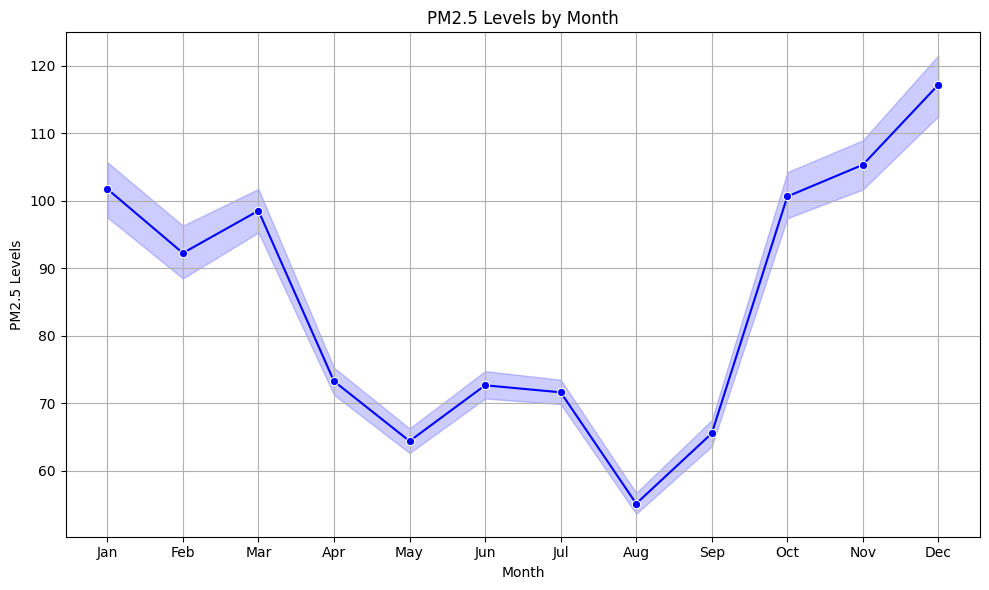

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=prsa_df.month, y=prsa_df['PM2.5'], marker='o', color='b')
plt.title('PM2.5 Levels by Month')
plt.xticks(range(1, 13), months)
plt.xlabel('Month')
plt.ylabel('PM2.5 Levels')
plt.grid()
plt.tight_layout()
plt.show()

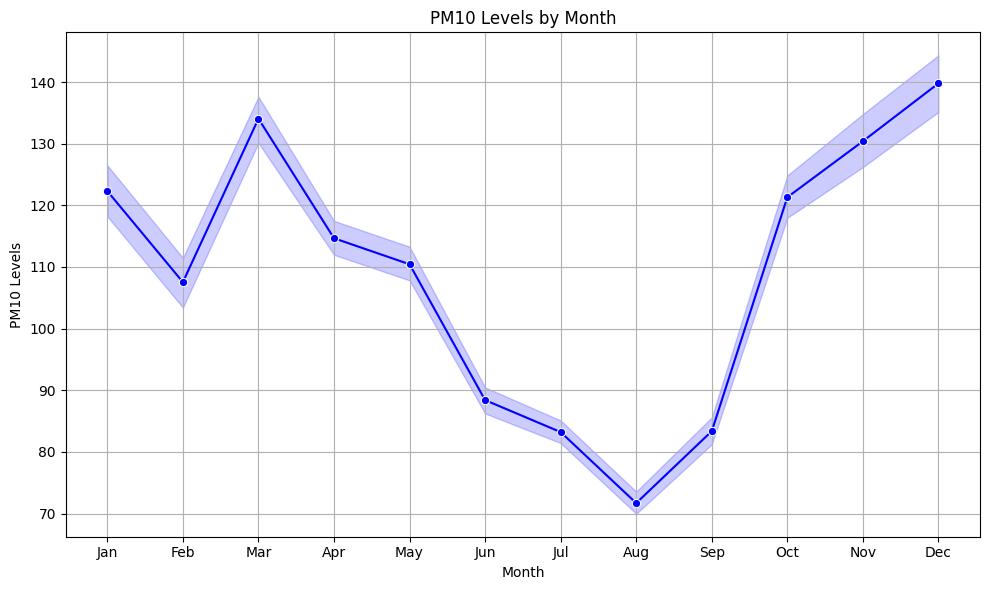

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=prsa_df.month, y=prsa_df['PM10'], marker='o', color='b')
plt.title('PM10 Levels by Month')
plt.xticks(range(1, 13), months)
plt.xlabel('Month')
plt.ylabel('PM10 Levels')
plt.grid()
plt.tight_layout()
plt.show()

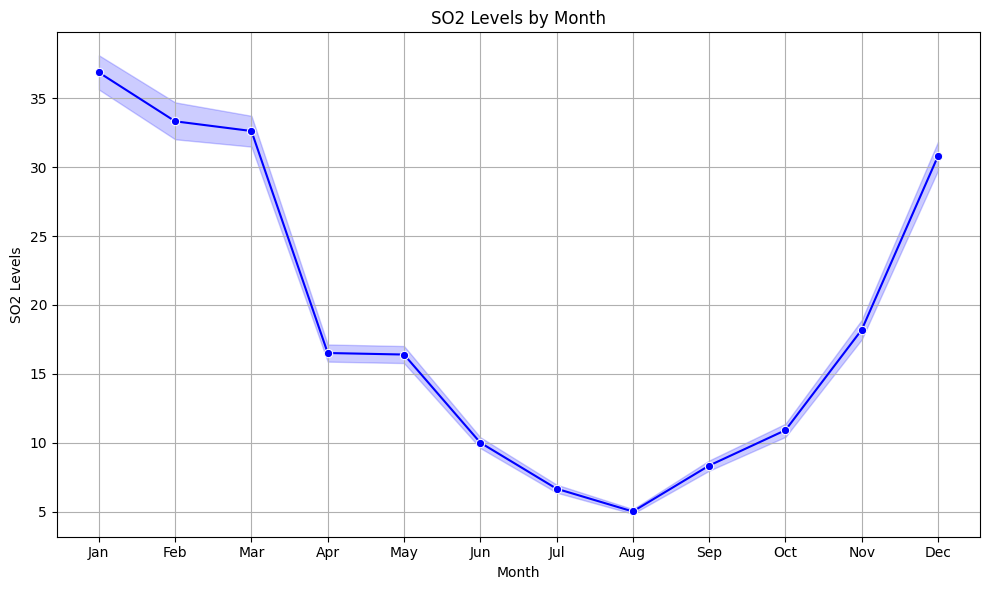

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=prsa_df.month, y=prsa_df['SO2'], marker='o', color='b')
plt.title('SO2 Levels by Month')
plt.xticks(range(1, 13), months)
plt.xlabel('Month')
plt.ylabel('SO2 Levels')
plt.grid()
plt.tight_layout()
plt.show()

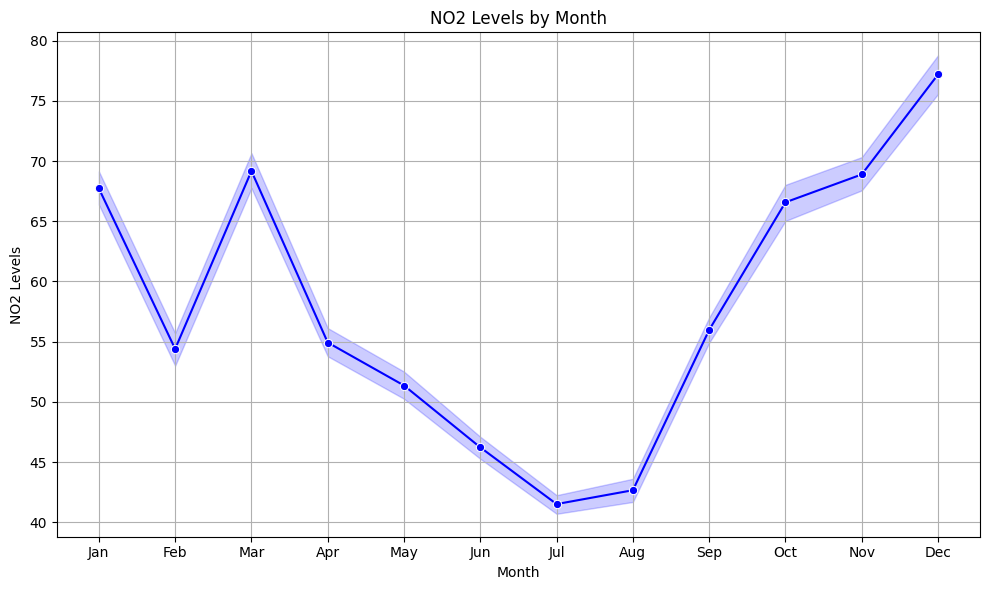

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=prsa_df.month, y=prsa_df['NO2'], marker='o', color='b')
plt.title('NO2 Levels by Month')
plt.xticks(range(1, 13), months)
plt.xlabel('Month')
plt.ylabel('NO2 Levels')
plt.grid()
plt.tight_layout()
plt.show()

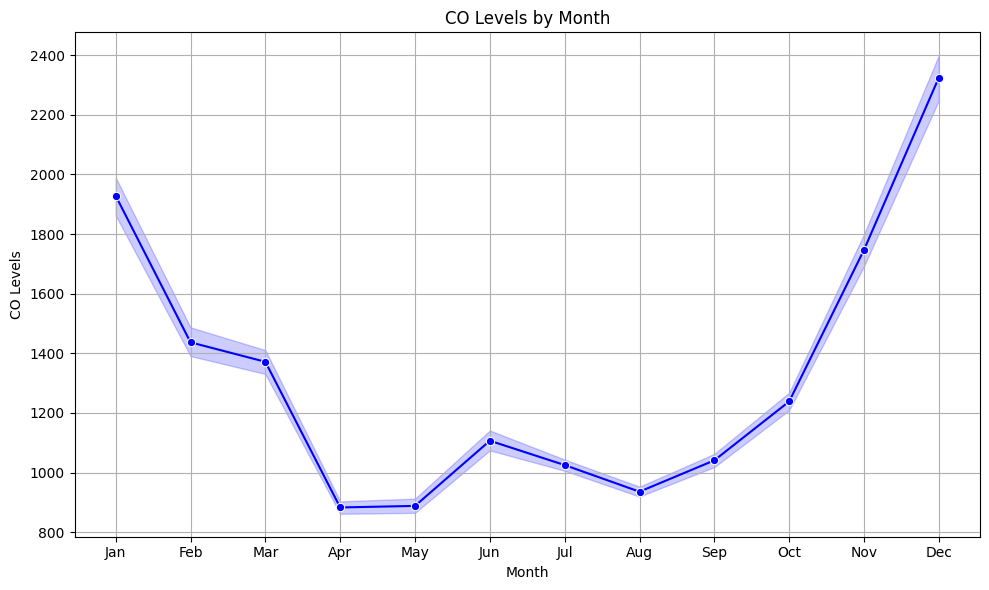

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=prsa_df.month, y=prsa_df['CO'], marker='o', color='b')
plt.title('CO Levels by Month')
plt.xticks(range(1, 13), months)
plt.xlabel('Month')
plt.ylabel('CO Levels')
plt.grid()
plt.tight_layout()
plt.show()

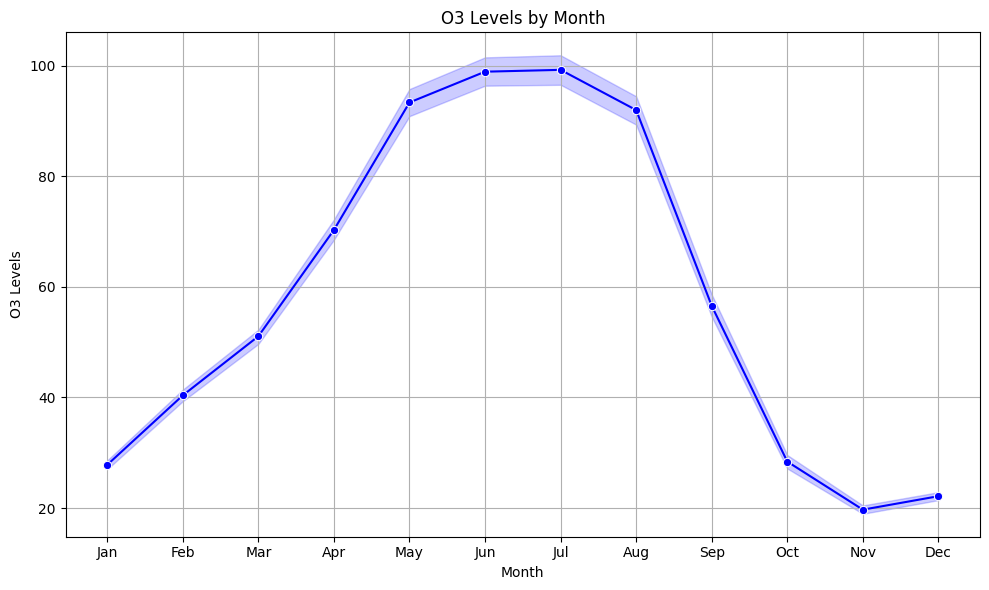

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=prsa_df.month, y=prsa_df['O3'], marker='o', color='b')
plt.title('O3 Levels by Month')
plt.xticks(range(1, 13), months)
plt.xlabel('Month')
plt.ylabel('O3 Levels')
plt.grid()
plt.tight_layout()
plt.show()

Tren ini menunjukkan pola musim yang jelas pada musim dingin yang memiliki tingkat polusi yang lebih tinggi kecuali untuk O3, yang mencapai puncaknya pada musim panas karena sinar matahari dan suhu yang lebih tinggi.

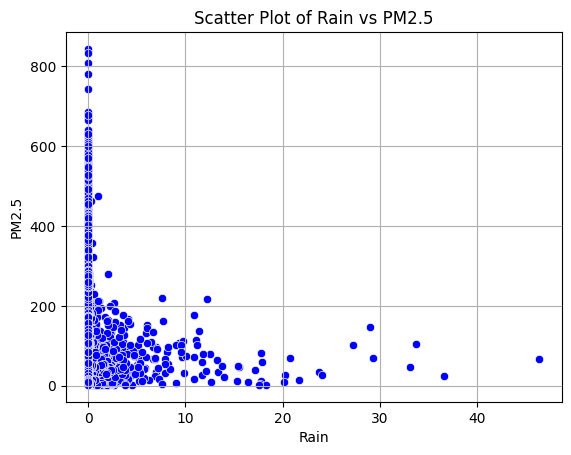

In [45]:
sns.scatterplot(x=prsa_df['RAIN'], y=prsa_df['PM2.5'], color='blue')
plt.title('Scatter Plot of Rain vs PM2.5')
plt.xlabel('Rain')
plt.ylabel('PM2.5')
plt.grid()
plt.show()

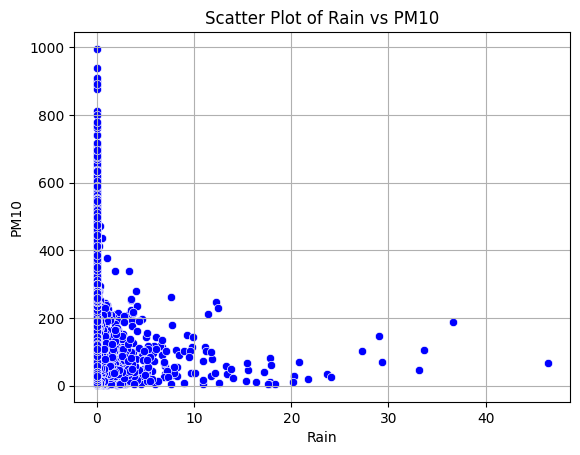

In [46]:
sns.scatterplot(x=prsa_df['RAIN'], y=prsa_df['PM10'], color='blue')
plt.title('Scatter Plot of Rain vs PM10')
plt.xlabel('Rain')
plt.ylabel('PM10')
plt.grid()
plt.show()

ini menunjukkan korelasi antara hujan dan tingkat materi partikulat di atmosfer

In [48]:
prsa_df.to_csv("use_this_data.csv", index=False)